Column Names: Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


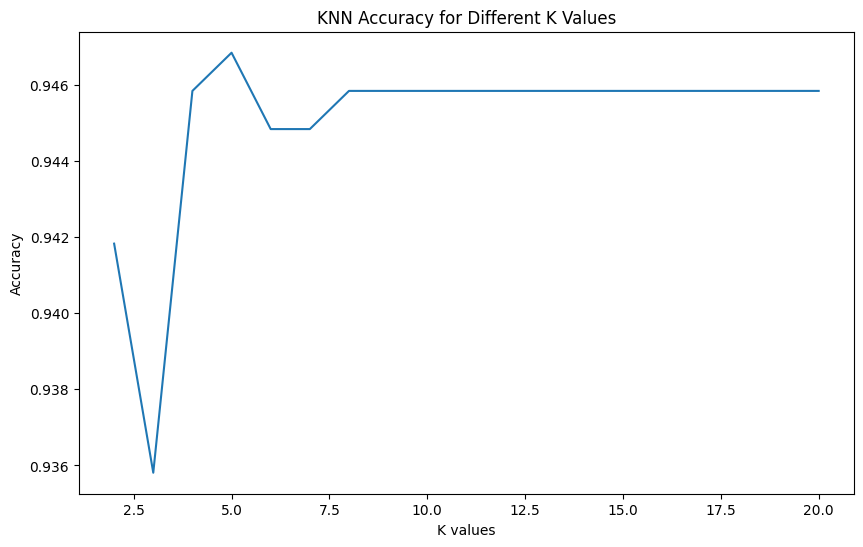


KNN:
Accuracy: 0.9468405215646941
Precision: 0.5714285714285714
Recall: 0.07407407407407407
F1-score: 0.13114754098360656
Confusion Matrix:
[[940   3]
 [ 50   4]]


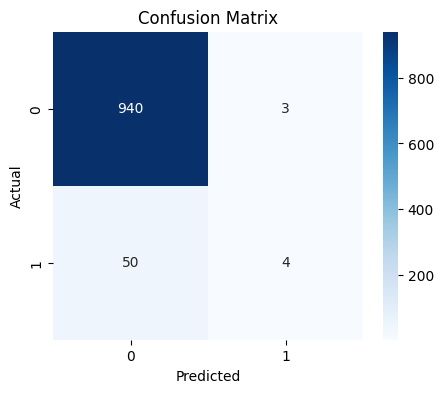


Decision Tree:
Accuracy: 0.9167502507522568
Precision: 0.24561403508771928
Recall: 0.25925925925925924
F1-score: 0.2522522522522523
Confusion Matrix:
[[900  43]
 [ 40  14]]


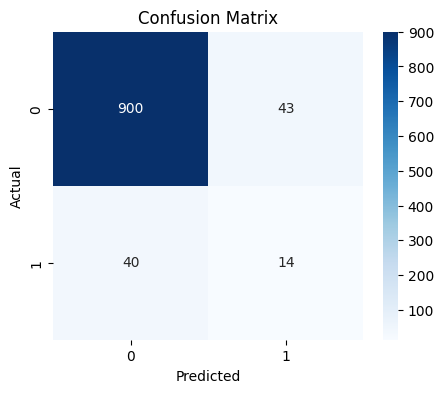


SVM:
Accuracy: 0.9458375125376128
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
[[943   0]
 [ 54   0]]


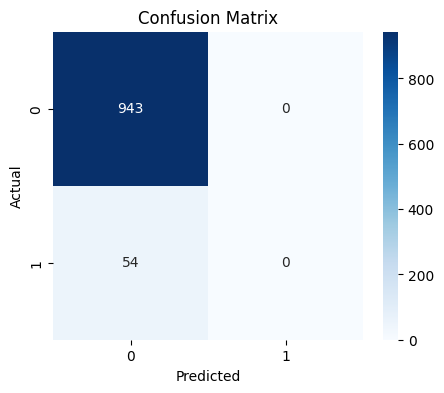


Naive Bayes:
Accuracy: 0.7512537612838516
Precision: 0.13257575757575757
Recall: 0.6481481481481481
F1-score: 0.220125786163522
Confusion Matrix:
[[714 229]
 [ 19  35]]


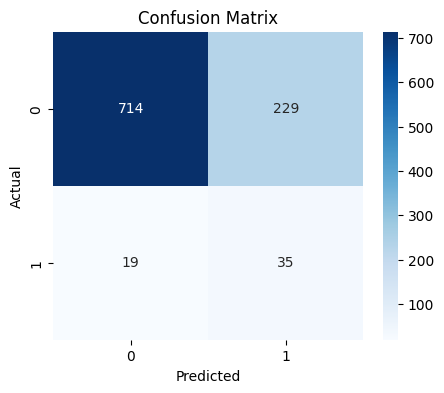


Linear Regression:
Accuracy: 0.9458375125376128
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
[[943   0]
 [ 54   0]]


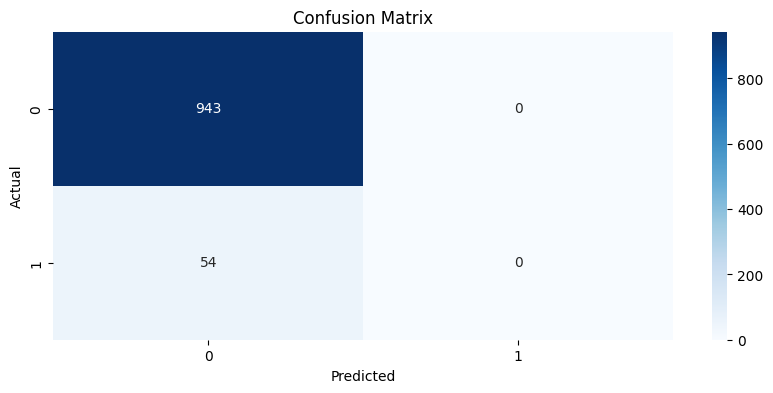

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Read the data with pandas and find features and target variables
data = pd.read_csv('/content/full_data.csv')

# Print column names to identify categorical columns
print("Column Names:", data.columns)

# Correct column names in categorical_cols based on actual column names in the dataset
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Handle categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Separate features and target variable
features = data_encoded.drop('stroke', axis=1)
target = data_encoded['stroke']

# Normalize the data with min-max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train KNN
knn_scores = []
k_values = range(2, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_scores.append(acc)

# Plot accuracy for different K values [2-20]
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_scores)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.show()
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # You can set the number of neighbors as desired
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\nKNN:")
print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)
conf_matrix = confusion_matrix(y_test,y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train Decision Tree and find performance metrics
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print("\nDecision Tree:")
print("Accuracy:", acc_dt)
print("Precision:", prec_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
conf_matrix = confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Train SVM and find performance metrics
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm,zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print("\nSVM:")
print("Accuracy:", acc_svm)
print("Precision:", prec_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
conf_matrix = confusion_matrix(y_test,y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train Naive Bayes and find performance metrics
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
print("\nNaive Bayes:")
print("Accuracy:", acc_nb)
print("Precision:", prec_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)
conf_matrix = confusion_matrix(y_test,y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Train Logistic Regression and find performance metrics
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr,zero_division=0)  # Set zero_division=0
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print("\nLinear Regression:")
print("Accuracy:", acc_lr)
print("Precision:", prec_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
conf_matrix = confusion_matrix(y_test,y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(10, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Classifier:
Accuracy: 0.9398194583751254
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[937   6]
 [ 54   0]]


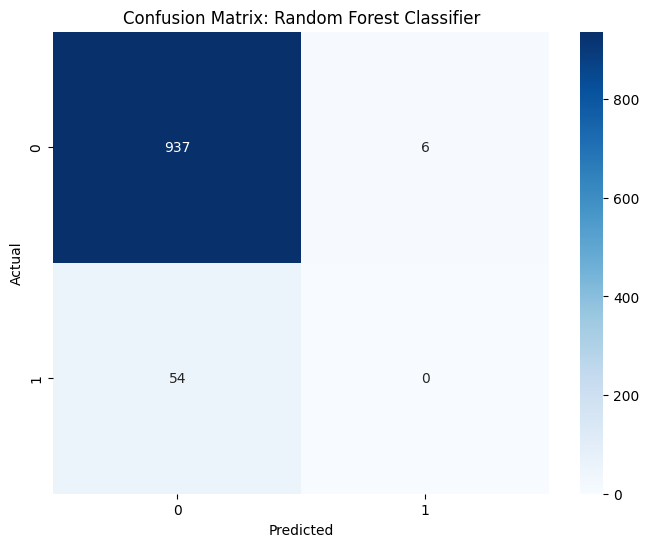


AdaBoost Classifier:
Accuracy: 0.9468405215646941
Precision: 1.0
Recall: 0.018518518518518517
F1 Score: 0.03636363636363636
Confusion Matrix:
[[943   0]
 [ 53   1]]


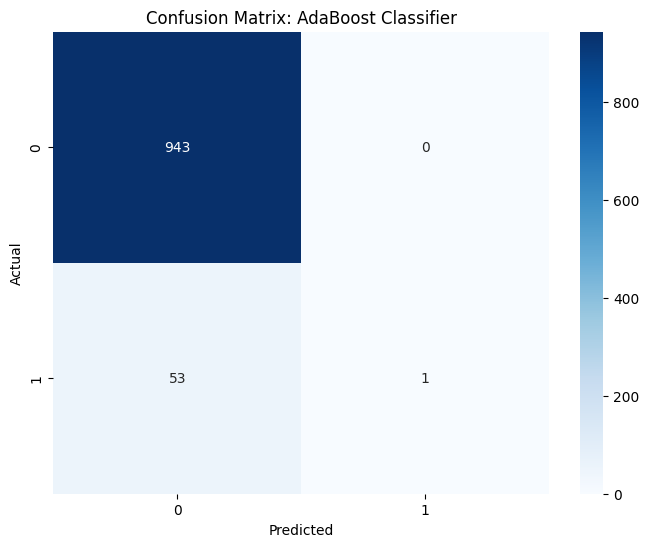

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
data = pd.read_csv('/content/full_data.csv')

# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Separate features and target variable
features = data_encoded.drop('stroke', axis=1)
target = data_encoded['stroke']

# Normalize the data with min-max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Initialize classifiers
rf_classifier = RandomForestClassifier()
ab_classifier = AdaBoostClassifier()

# Train classifiers
rf_classifier.fit(X_train, y_train)
ab_classifier.fit(X_train, y_train)

# Predict on test data
rf_y_pred = rf_classifier.predict(X_test)
ab_y_pred = ab_classifier.predict(X_test)

# Calculate performance metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print("Confusion Matrix:")
print(rf_confusion_matrix)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix: Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate performance metrics for AdaBoost
ab_accuracy = accuracy_score(y_test, ab_y_pred)
ab_precision = precision_score(y_test, ab_y_pred)
ab_recall = recall_score(y_test, ab_y_pred)
ab_f1 = f1_score(y_test, ab_y_pred)
ab_confusion_matrix = confusion_matrix(y_test, ab_y_pred)

print("\nAdaBoost Classifier:")
print(f"Accuracy: {ab_accuracy}")
print(f"Precision: {ab_precision}")
print(f"Recall: {ab_recall}")
print(f"F1 Score: {ab_f1}")
print("Confusion Matrix:")
print(ab_confusion_matrix)

# Plot confusion matrix for AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(ab_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix: AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Gradient Boosting Classifier:
Accuracy: 0.9468405215646941
Precision: 0.6666666666666666
Recall: 0.037037037037037035
F1 Score: 0.07017543859649122
Confusion Matrix:
[[942   1]
 [ 52   2]]


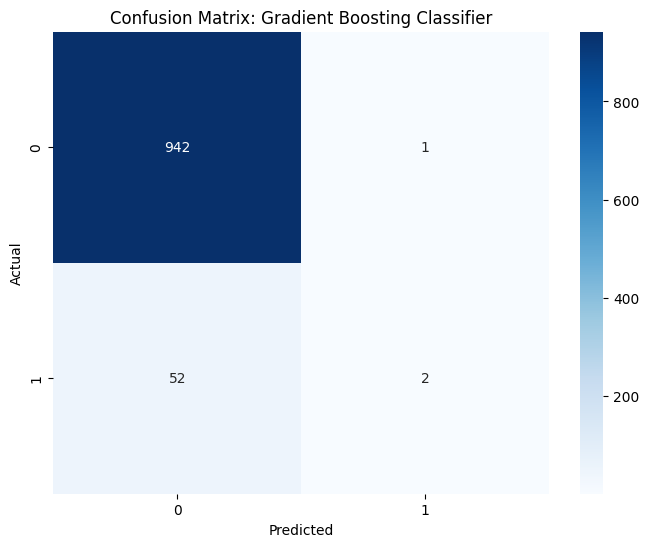


XGBoost Classifier:
Accuracy: 0.9388164493480441
Precision: 0.23076923076923078
Recall: 0.05555555555555555
F1 Score: 0.08955223880597016
Confusion Matrix:
[[933  10]
 [ 51   3]]


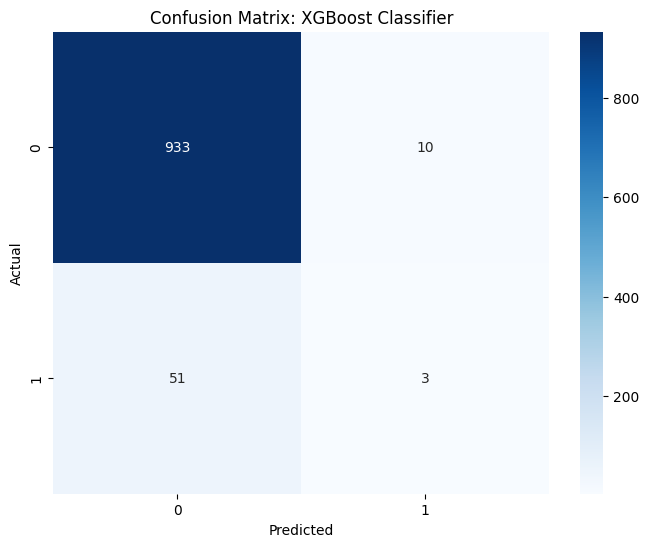

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/full_data.csv')

# Separate features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Evaluate the Gradient Boosting model
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)
gb_confusion_matrix = confusion_matrix(y_test, gb_y_pred)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {gb_accuracy}")
print(f"Precision: {gb_precision}")
print(f"Recall: {gb_recall}")
print(f"F1 Score: {gb_f1}")
print("Confusion Matrix:")
print(gb_confusion_matrix)

# Plot confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(gb_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix: Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the XGBoost model
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_confusion_matrix = confusion_matrix(y_test, xgb_y_pred)

print("\nXGBoost Classifier:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")
print("Confusion Matrix:")
print(xgb_confusion_matrix)

# Plot confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix: XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-5-24d95c02bf4c>:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(classifiers.keys(), rotation=45, ha='right')


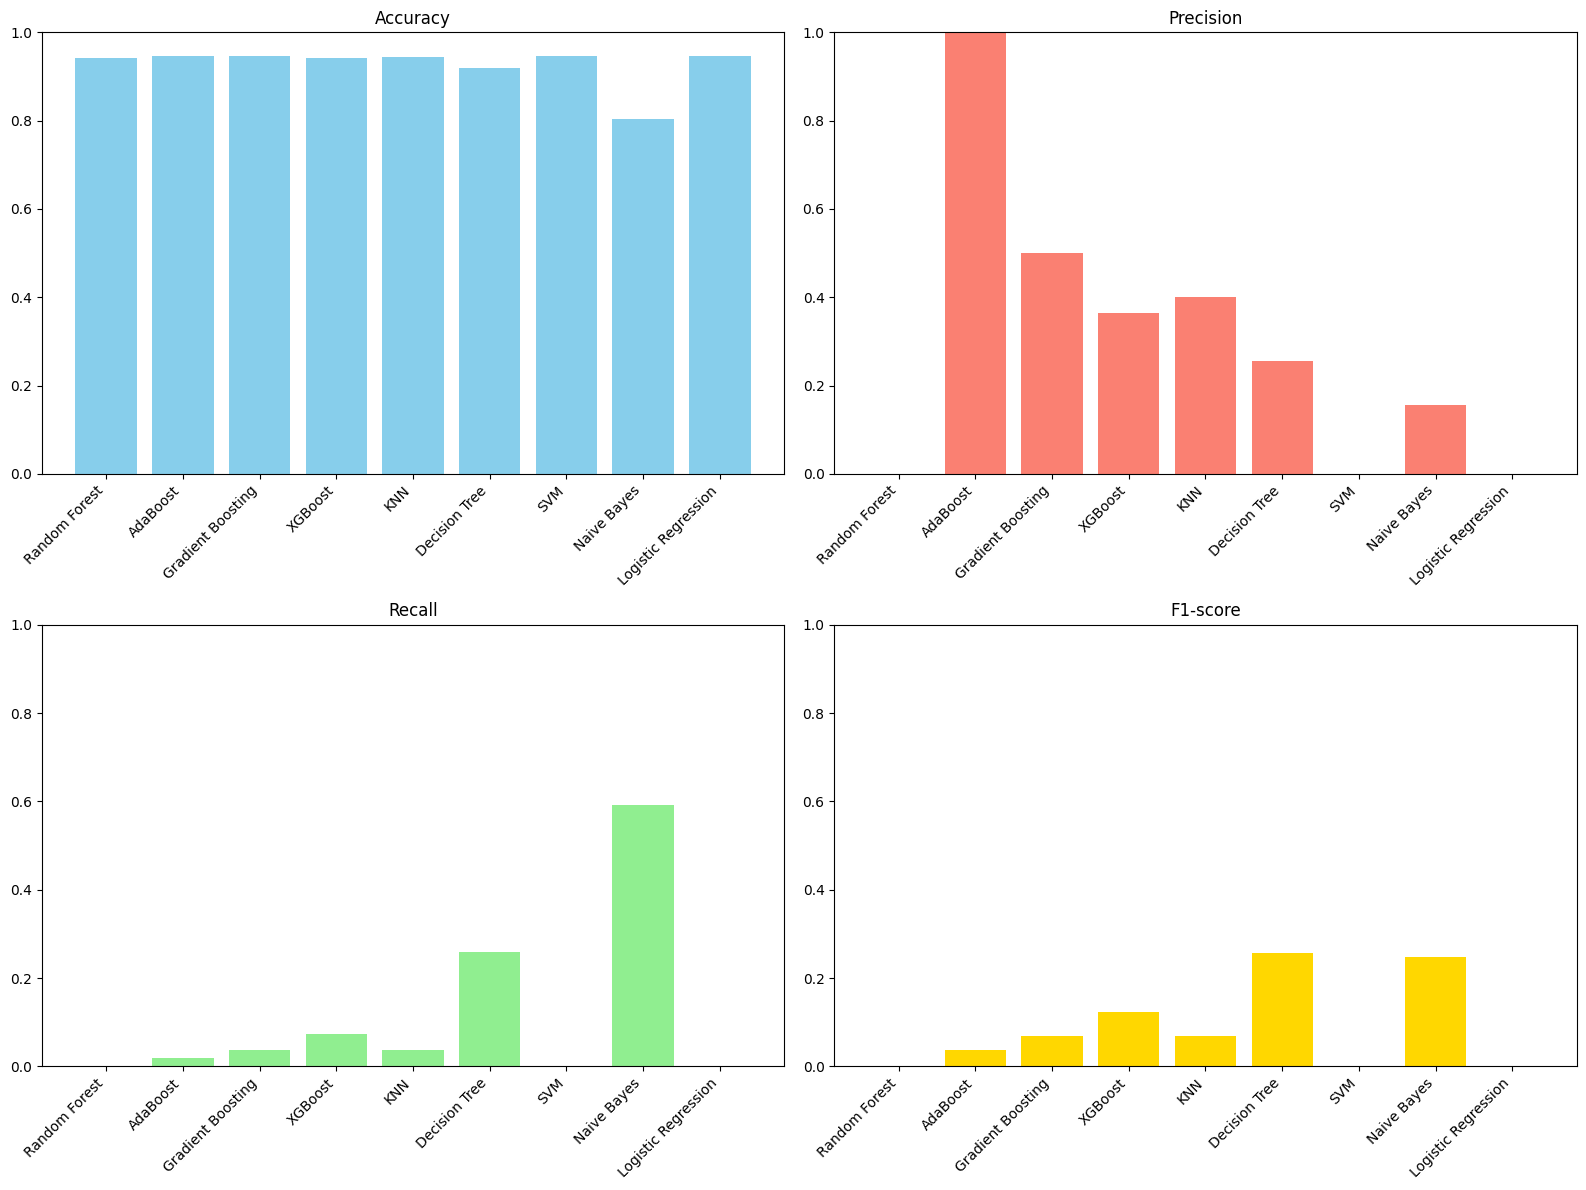

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Read the data
data = pd.read_csv('/content/full_data.csv')

# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Separate features and target variable
features = data_encoded.drop('stroke', axis=1)
target = data_encoded['stroke']

# Normalize the data with min-max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression()
}

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy plot
ax[0, 0].bar(classifiers.keys(), accuracy_scores, color='skyblue')
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_ylim([0, 1])

# Precision plot
ax[0, 1].bar(classifiers.keys(), precision_scores, color='salmon')
ax[0, 1].set_title('Precision')
ax[0, 1].set_ylim([0, 1])

# Recall plot
ax[1, 0].bar(classifiers.keys(), recall_scores, color='lightgreen')
ax[1, 0].set_title('Recall')
ax[1, 0].set_ylim([0, 1])

# F1-score plot
ax[1, 1].bar(classifiers.keys(), f1_scores, color='gold')
ax[1, 1].set_title('F1-score')
ax[1, 1].set_ylim([0, 1])

# Rotate x-axis labels
for axes in ax:
    for axis in axes:
        axis.set_xticklabels(classifiers.keys(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

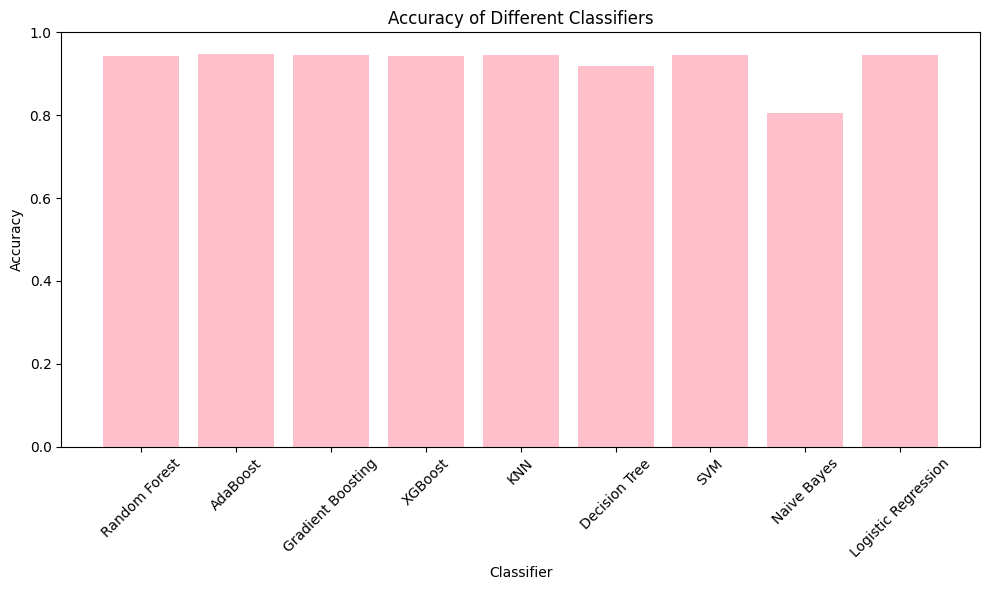

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Read the data
data = pd.read_csv('/content/full_data.csv')

# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Separate features and target variable
features = data_encoded.drop('stroke', axis=1)
target = data_encoded['stroke']

# Normalize the data with min-max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression()
}

# Initialize list to store accuracies
accuracies = []

# Loop through classifiers and calculate accuracies
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), accuracies, color='pink')
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()